In [1]:
# Copyright (c) 2021, Ahmed M. Alaa
# Licensed under the BSD 3-clause license (see LICENSE.txt)


from __future__ import absolute_import, division, print_function
import numpy as np
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

    
from representations.OneClass import * 
from metrics.evaluation import *

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_0 = [50, -40]
cov_0  = [[10, 0], [0, 10]] 

mean_1 = [50, 20]
cov_1  = [[10, 75], [75, 50]]

mean_g = [50, 20] #[-30, 32] #
cov_g  = [[200, 300], [400, 3000]] #[[20, 30], [400, 30]]

In [3]:
n_samples         = 1000
component_id      = np.random.binomial(1, 0.99, n_samples) 
component_id      = np.repeat(component_id.reshape((-1, 1)), 2, axis=1)

x_0               = np.random.multivariate_normal(mean_0, cov_0, n_samples)
x_1               = np.random.multivariate_normal(mean_1, cov_1, n_samples)

true_samples      = component_id * x_0 + (1 - component_id) * x_1
generated_samples = np.random.multivariate_normal(mean_g, cov_g, n_samples)

generated_samples = component_id * (true_samples + np.random.normal(0, 1, size=(true_samples.shape[0], true_samples.shape[1])))  + (1 - component_id) * generated_samples

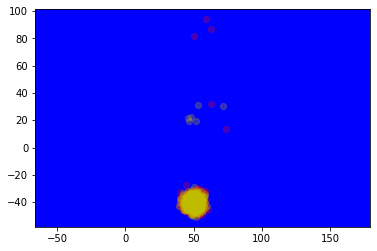

In [4]:
fig = plt.figure()

plt.plot(generated_samples[:, 0], generated_samples[:, 1], "o", color="r", alpha=.25)
plt.plot(true_samples[:, 0], true_samples[:, 1], "o", color="y", alpha=.25)

plt.axis('equal')

ax = plt.axes()
ax.set_facecolor('blue')

plt.show()

In [5]:
params  = dict({"rep_dim": 2, 
                "input_dim": 2, 
                "num_layers": 2, 
                "num_hidden": 200, 
                "activation": "Tanh",
                "dropout_prob": 0.5, 
                "dropout_active": False,
                "LossFn": "SoftBoundary"})   

hyperparams = dict({"center": torch.tensor([[10., 10.]]), "Radius": 1, "nu": 1e-2})

model       = OneClassLayer(params=params, hyperparams=hyperparams) 

In [ ]:
model.fit(true_samples, learningRate=1e-2, epochs=1000)

In [7]:
X_true_out  = model(torch.tensor(true_samples).float()).float().detach().numpy()
X_gen_out   = model(torch.tensor(generated_samples).float()).float().detach().numpy()

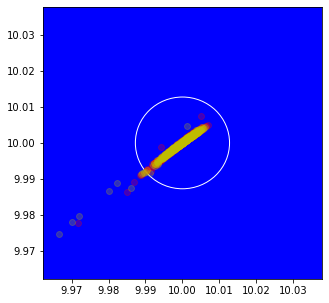

In [8]:
fig = plt.figure(figsize=(5, 5))

plt.plot(X_gen_out[:, 0], X_gen_out[:, 1], "o", color="r", alpha=.25)
plt.plot(X_true_out[:, 0], X_true_out[:, 1], "o", color="y", alpha=.25)


ax = plt.axes()
ax.set_facecolor('blue')

R       = np.quantile(torch.sqrt(torch.sum((torch.tensor(X_true_out).float() - model.c) ** 2, dim=1)), 1 - model.nu)
circle  = plt.Circle(list(model.c.float().detach().numpy()[0]), R, color='white', fill=False)

ax.add_artist(circle)

plt.xlim(model.c[0][0].detach().numpy() - R - .025, model.c[0][0].detach().numpy() + R + .025)
plt.ylim(model.c[0][1].detach().numpy() - R - .025, model.c[0][1].detach().numpy() + R + .025)

plt.show()

In [15]:
alphas, alpha_precision_curve, beta_coverage_curve, Delta_precision_alpha, Delta_coverage_beta, (thresholds, authen) = compute_alpha_precision(X_true_out, X_gen_out, model)

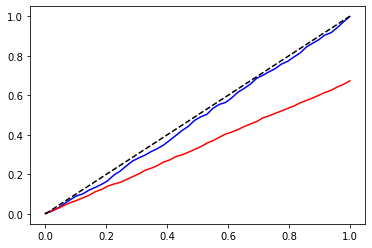

In [16]:
plt.plot(alphas, alpha_precision_curve, color="b")
plt.plot(alphas, beta_coverage_curve, color="r")

plt.plot(alphas, alphas, color="black", linestyle="--")


In [17]:
Delta_precision_alpha, Delta_coverage_beta

(0.9579183679948352, 0.664571432591587)

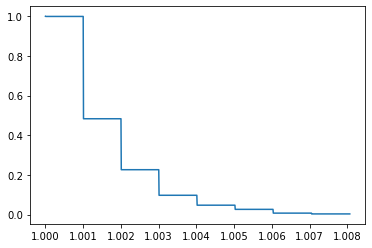

In [18]:
plt.plot(thresholds, authen)